# Project Business Statistics: E-news Express


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]



## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# to set a graph theme in seaborn
sns.set_theme(style="darkgrid",  palette="husl")

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [3]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Project-2/abtest.csv')

# Take a copy of the data to work it forward.
df=data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# to view the first 10 rows
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish
5,546558,control,old,5.280,yes,English
6,546448,treatment,new,5.250,yes,French
7,546581,control,old,6.530,yes,Spanish
8,546461,treatment,new,10.710,yes,French
9,546548,control,old,2.080,no,English


In [ ]:
# to view the last 10 rows
df.tail(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
90,546477,treatment,new,5.400,no,French
91,546451,treatment,new,8.470,yes,English
92,546566,control,old,8.350,no,French
93,546474,treatment,new,4.940,no,French
94,546550,control,old,3.050,no,English
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


In [ ]:
# display the shape of the dataset
df.shape

(100, 6)

In [ ]:
# dataset info on columns and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Display statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.000,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
time_spent_on_the_page,100.000,5.378,2.378,0.190,3.880,5.415,7.022,10.710


In [ ]:
# Check for missing values
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
df.group.value_counts()

,count
group,
control,50
treatment,50


In [ ]:
df.landing_page.value_counts()

,count
landing_page,
old,50
new,50


In [ ]:
df.converted.value_counts()

,count
converted,
yes,54
no,46


### General Observations


*   There are 100 rows and 6 columns in the given data set
*   There are only two numeric columns present in the dataset - user_id and time_spent_on_page
*   There are no missing values in the dataset
*   There are no duplicate values in the dataset
*   The average time spent on the page is about 5.38 minutes
*   The minimum time spent on the page was 0.19 minutes and the maximum time spent on the page was 10.71 minutes
*   50% of the users spent about 5.42 minutes on the page
*   There are 50 users each in 'control' group and 'treatment' group.
*   There are 50 users each provided with old and new landing pages.
*   In the give sample of 100 users, 54 users are converted to subscriber and 46 are not









### Univariate Analysis

*Out of the 2 numeric columns in the data set - user_id doesn't tell much about any trends; so lets start with the other numeric variable - "time_spent_on_page"*


### time_spent_on_the_page

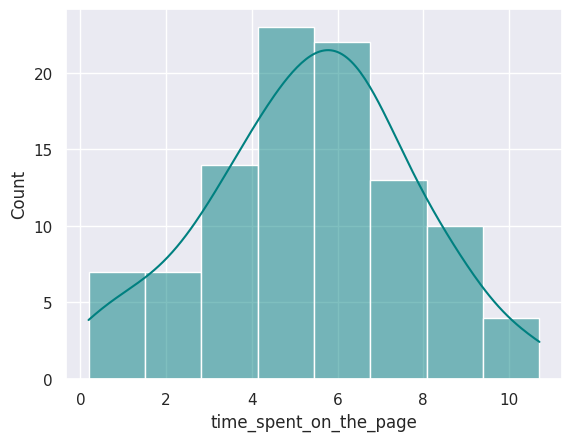

In [ ]:
## Histogram for the time_spent_on_the_page
sns.histplot(data=df, x='time_spent_on_the_page',kde=True,color="teal");

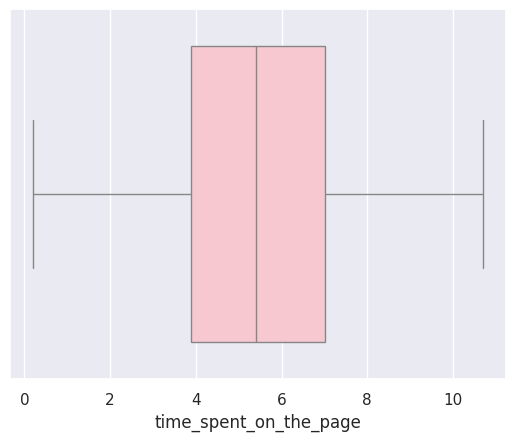

In [ ]:
## Boxplot for the cost of order
sns.boxplot(data=df,x='time_spent_on_the_page',color='pink');

#### Observations:

*   The "time spent on the page" is a almost seem to be a normal distribution
*   There are no outliers present for the distribution


### group

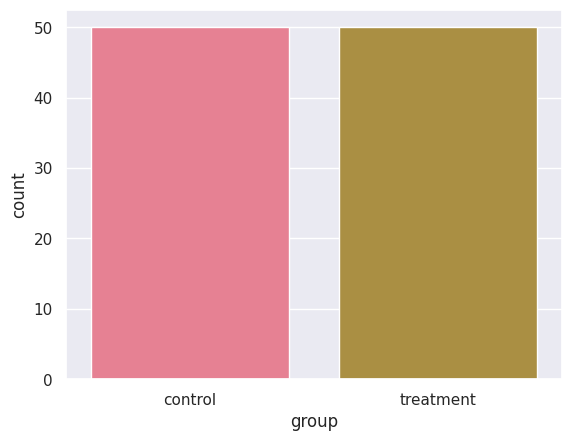

In [4]:
# Plot the distribution of the group variable
sns.countplot(data=df,x='group',hue='group');
plt.show()

#### Observations:

*   The sample population of users are equally split into 2 groups - "Control" and "Treatment"


### landing_page

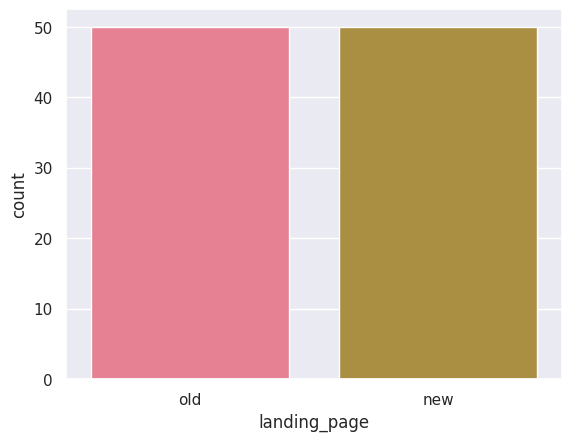

In [5]:
# plot the distribution of the landing_page variable
sns.countplot(data=df,x='landing_page',hue='landing_page');
plt.show()

#### Observations:

*   The sample population of users are equally divided to provide new and old landing pages

### converted

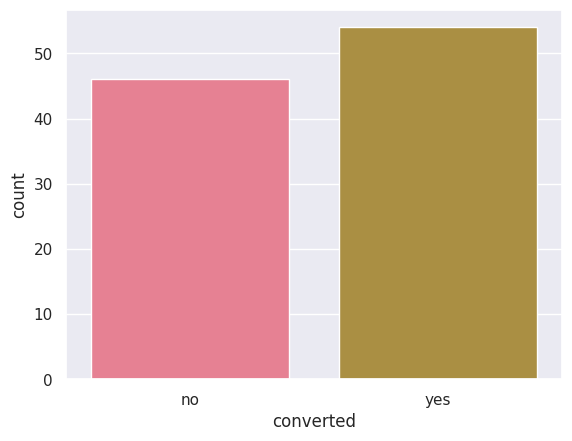

In [6]:
# Plot the distribution of the converted variable
sns.countplot(data=df,x='converted',hue='converted');
plt.show()

#### Observations:

*  More users got converted compared to users who did not convert.

### language_preferred

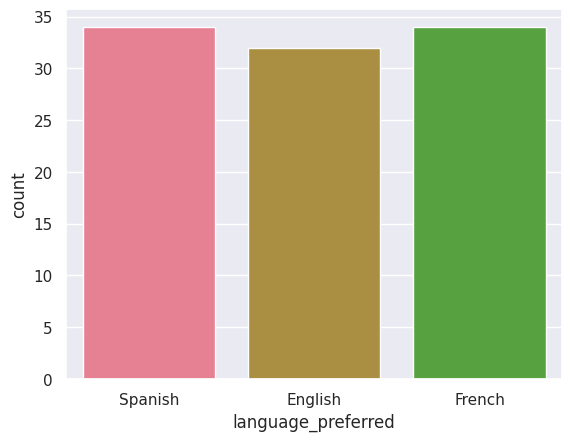

In [ ]:
# plot the distribution of the language_preferred variable
sns.countplot(data=df,x='language_preferred',hue='language_preferred');
plt.show()

#### Observations:

*  Spanish and French had the most amount of entries with 34 each and English had the least amount of entries with 32.

### Bivariate Analysis

### Group Vs Time spent on page

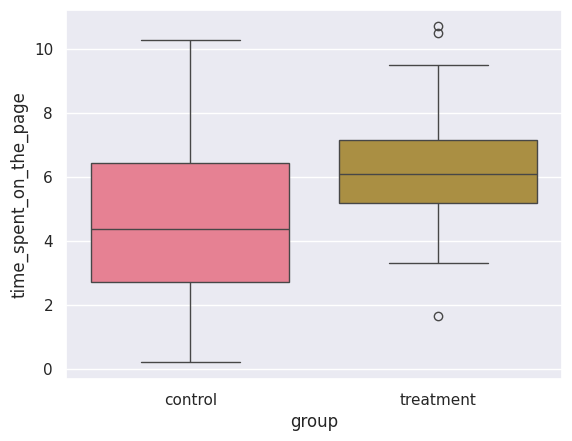

In [ ]:
# Plot the relationship between Group and time spent on page - use box plot
sns.boxplot(data=df,x='group',y='time_spent_on_the_page',hue='group');
plt.show()

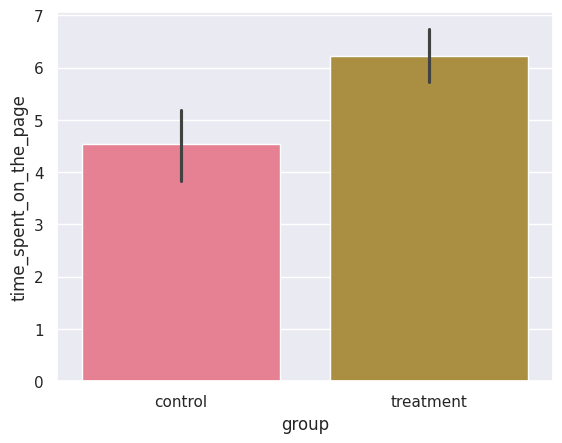

In [ ]:
# Plot the relationship between Group and time spent on page - use bar plot
sns.barplot(data=df,x='group',y='time_spent_on_the_page',hue='group');
plt.show()

#### Observations:

The users in the treatment group found to be spending more time on the page than the control group

### Landing Page Vs Time spent on page

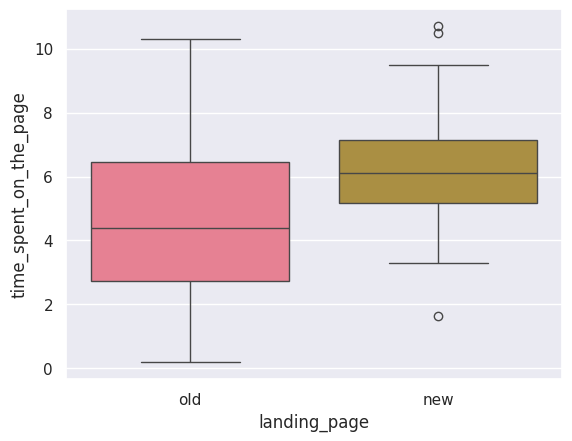

In [ ]:
# Plot the relationship between landing page and time spent on page - box plot
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',hue='landing_page');
plt.show()

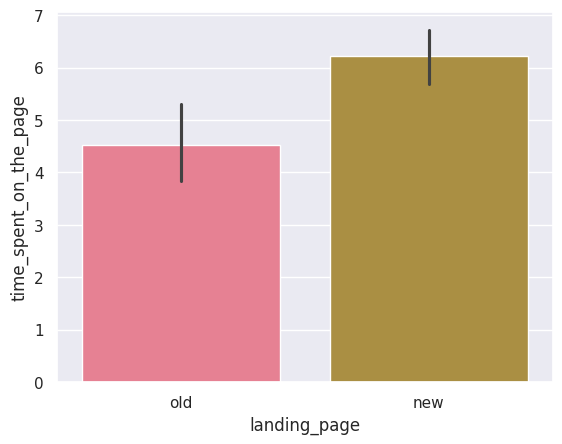

In [ ]:
# Plot the relationship between landing page and time spent on page - bar plot
sns.barplot(data=df,x='landing_page',y='time_spent_on_the_page',hue='landing_page');
plt.show()

#### Observations:

The users have spent more time on the new landing page compared to the old landing page

### Converted status Vs Time spent on page

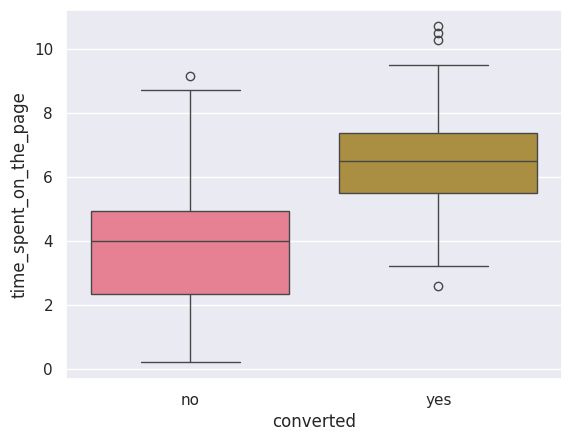

In [ ]:
# Plot the relationship between conversion status and time spent on page - box plot
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',hue='converted');
plt.show()

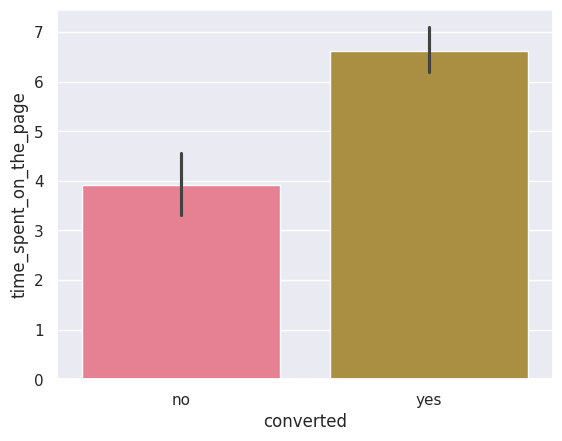

In [ ]:
# Plot the relationship between conversion status and time spent on page - bar plot
sns.barplot(data=df,x='converted',y='time_spent_on_the_page',hue='converted');
plt.show()

#### Observations:

The users got converted to a subscriber spent more time on the page than the others

###Language preferred vs Time spent on the page

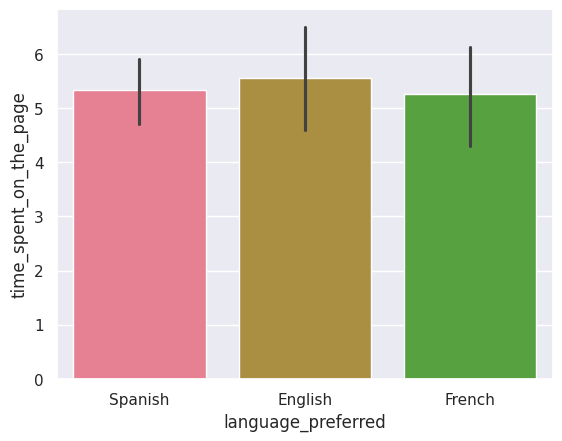

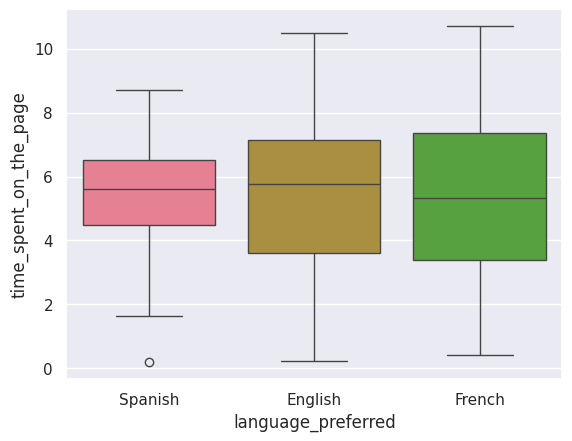

In [6]:
# Plot the relationship between the preferred language and the time spent on the page
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page',hue='language_preferred')
plt.show()
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page',hue='language_preferred')
plt.show()

#### Observations:

The mean time spent on the page seems to be somewhat same for all the preferred languages.

### group Vs time spent on the page Vs conversion status

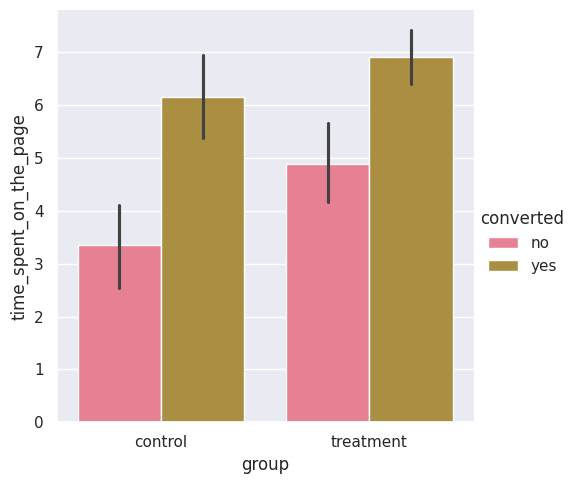

In [ ]:
# Plot the relationship between group, conversion status and time spent on page - bar plot
sns.catplot(data=df,x= 'group', y='time_spent_on_the_page', hue='converted',  kind='bar');
plt.show()

#### Observations:

The users in teh treatment group spent more time on the page and more converted to subscribers than the control group

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

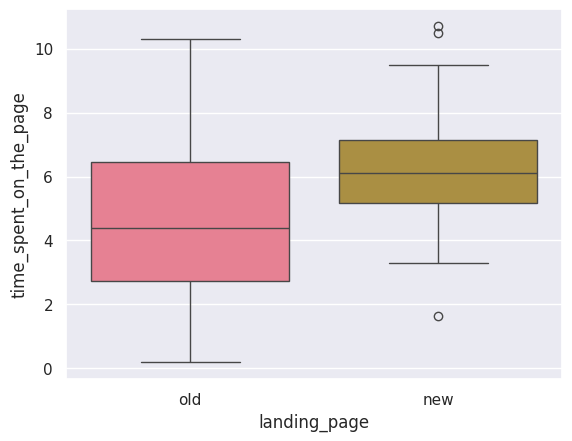

In [ ]:
# Plot the relationship between landing page and time spent on page - box plot
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',hue='landing_page');
plt.show()

###Observations:

The users have spent more time on the new landing page compared to the old landing page

### Step 1: Define the null and alternate hypotheses

μ<sub>0</sub>: The mean time spent by the users on the old page.

μ<sub>a</sub>: The mean time spent by the users on the new page.

Null Hypothesis:

H<sub>0</sub>:   μ<sub>0</sub> = μ<sub>a</sub>  

Alternate Hypothesis:

H<sub>a</sub>:   μ<sub>a</sub> > μ<sub>0</sub>  



### Step 2: Select Appropriate test



*   Testing for equality of means from 2 samples
*   Random sampling from the population
*   Independent populations
*   Continuous data
*   Normally distibuted population
*   Unknown population std deviations
*   Unknown population std deviations/variance - assumed since the sample std deviations are different

***Based on the above, a 2-sample independent t-test would be appropriate in this case***







### Step 3: Decide the significance level

As per problem statement, lets select the significant level as 5%

α
=
0.05


### Step 4: Collect and prepare data

In [ ]:
# Lets create 2 new data sets to capture the time spent on the new/old landing pages
newlp_time_spent = df[df['landing_page']=='new']['time_spent_on_the_page']
oldlp_time_spent = df[df['landing_page']=='old']['time_spent_on_the_page']
print('The mean time spent in old landing page:', round(oldlp_time_spent.mean(),2))
print('The mean time spent in old landing page:', round(newlp_time_spent.mean(),2))
print('The std.dev of  time spent in old landing page:', round(oldlp_time_spent.std(),2))
print('The std.dev of time spent in new landing page:', round(newlp_time_spent.std(),2))


The mean time spent in old landing page: 4.53
The mean time spent in old landing page: 6.22
The std.dev of  time spent in old landing page: 2.58
The std.dev of time spent in new landing page: 1.82


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(newlp_time_spent, oldlp_time_spent, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# check for p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [ ]:
# Calculate the conversion rate for new and old pages
newlp_conversion_rate = df[df['landing_page']=='new'].converted.value_counts()['yes']/df[df['landing_page']=='new']['user_id'].count()
oldlp_conversion_rate = df[df['landing_page']=='old'].converted.value_counts()['yes']/df[df['landing_page']=='old']['user_id'].count()
print('The conversion rate in old landing page:', round(oldlp_conversion_rate,2))
print('The conversion rate in new landing page:', round(newlp_conversion_rate,2))

The conversion rate in old landing page: 0.42
The conversion rate in new landing page: 0.66


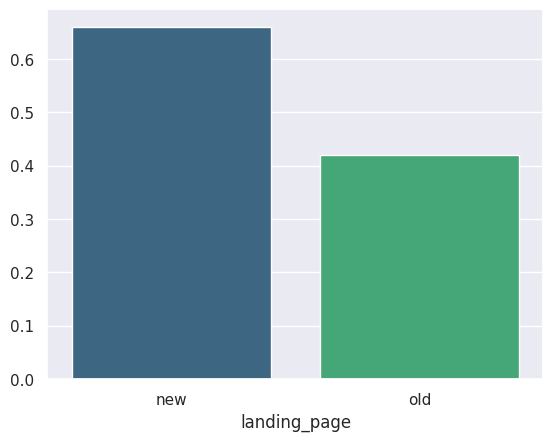

In [ ]:
# Plot a bar plot with the ratio of converted users who visit the new/old landing pages
ratio_df = pd.crosstab(df.landing_page, df.converted, normalize='index')['yes']
sns.barplot(x=ratio_df.index, y=ratio_df.values,hue=ratio_df.index,palette="viridis")
plt.show()

###Observations:

The conversion rate for the new page is greater than conversion rate for the old page

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the conversion rates in old and new landing pagesrespectively.

Lets test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_2 > p_1$

### Step 2: Select Appropriate test



*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Approximated to normal distribution
*   Random sampling from the population
*   Independent populations
*   Comparing 2 sample proportions

***Based on the above a 2 Sample Proportions Z-Test would be approriate here***





### Step 3: Decide the significance level

As per problem statement, lets select the significant level as 5%

α
=
0.05

### Step 4: Collect and prepare data

In [ ]:
pd.crosstab(df.landing_page, df.converted,margins=True)

converted,no,yes,All
landing_page,,,
new,17,33,50
old,29,21,50
All,46,54,100


In [ ]:
# set the counts of converted users
converted = np.array([33, 21])

# set the sample sizes
samples = np.array([50, 50])

### Step 5: Calculate the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(converted, samples,alternative ='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# check for p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.0080) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to say that the conversion rate for new landing page is greater than compared to old landing page

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

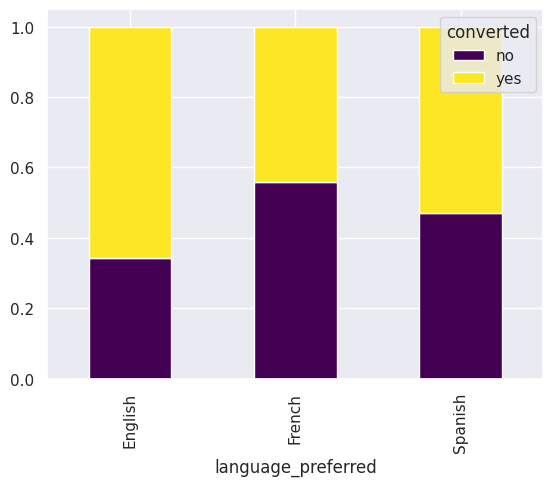

In [ ]:
#plot the conversion rate based on preferred language
lang_dep =pd.crosstab(df.language_preferred,df.converted, normalize='index')
lang_dep.plot(kind='bar', stacked=True, colormap='viridis');

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ The converted status is independent of the preferred language.

against the alternate hypothesis

>$H_a:$ The converted status is dependent of the preferred language.

### Step 2: Select Appropriate test


* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

***Based on this information, a chi-square test for independence would be the most approriate.***

### Step 3: Decide the significance level

As per problem statement, lets select the significant level as 5%

α
=
0.05

### Step 4: Collect and prepare data

In [ ]:
#creates a contingency table
lang_conv = pd.crosstab(df.converted, df.language_preferred)
lang_conv.head()

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lang_conv)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# check for p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the level of signifcance of 5%, we fail to reject the null hypothesis. This means that that the converted status is independent of the preferred language.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

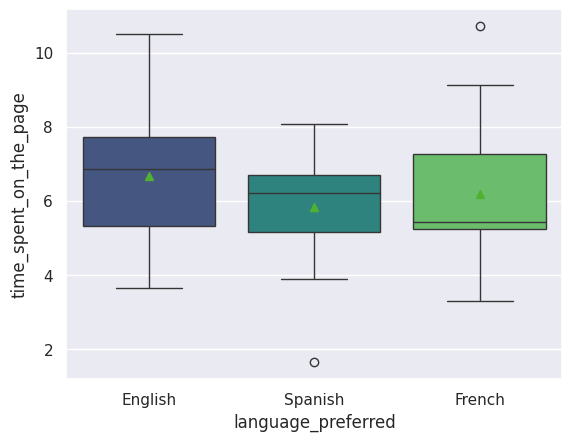

In [ ]:
# New df for users with new landing page
land_new= df.query("landing_page=='new'")

# Visualize the time spent on the new page for different language users
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', hue='language_preferred',showmeans = True, data = land_new, palette="viridis");
plt.show()


### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on new landing page for preferred language English, SPanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent on new landing page  is different from the rest of the languages

### Step 2: Select Appropriate test

Now, the normality and equality of variance assumptions need to be checked.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The new landing page time_spent follow a normal distribution

against the alternative hypothesis

>$H_a:$ The new landing page time_spent does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(land_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( land_new[land_new['language_preferred']=='English']['time_spent_on_the_page'],
                             land_new[land_new['language_preferred']=='French']['time_spent_on_the_page'],
                             land_new[land_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.


* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

***So Lets perform One-way ANOVA test to find the p-value***

### Step 3: Decide the significance level

As per problem statement, lets select the significant level as 5%

α
=
0.05

### Step 4: Collect and prepare data

In [ ]:
# create new datasets for the time spent on the new page for each preferred language
time_spent_English = land_new[land_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = land_new[land_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = land_new[land_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# check for p-value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the level of significance at 5%, the null hypothesis fails to be rejected. Hence the mean time spent on the new landing page is relatively similar regardless of the preferred language.

## Conclusion and Business Recommendations

### Conclusions



*   We do have visual evidence from the data that  the users spend more time on the new landing page than the existing landing page. To validate this a two-sample independent t-test was conducted and there by found that we do have enough statistical evidence to say that - *the users spend more time on the new landing page than the existing landing page*
*   The conversion rate for the new page is obviously greater than the conversion rate for the old page when looked through the metrics and visual analysis. To back this up a two-proportion z-test was performed and we got enough statistical evidence to say that *the conversion rate for the new page is greater than the old page.*
*   From the visual analysis, it was found that the conversion is slighltly higher with users preferred language as French followed by spanish and English. However, with Chi-Square test for independence, we did not have enough statistical evidence to conclude any dependency. That is *the converted status is independent of the preferred language.*
*   The visual analysis indicated the time spent on the new page for the English language users are slightly higher than the others. A one-way ANOVA test was conducted to validate this and found that the *mean time spent on the new landing page is relatively similar regardless of the preferred language.*


### Recommendations



*   From the above conclusions, its clear that the new landing page is effective in terms of the new outline and the recommended content since,
    - The customers spend more time on the new landing page
    - The conversion rate of Customers spening time on the new landing page to the subscribers are more than the old landing page.

     *Hence the Company should roll out the new design of the landing page to all its customers at the earliest to increase the subscription.*

*   Since its also found that the customers who spend more time in website/page tend to get converted as a subscriber, the company should focus more on the other aspects like content, visual appeal etc rather than just the landing page.

*   Even through the conversion status found to be independent of the preferred language, the company should include content in more languages, that would drive more customers into the page and there by eventually increasing the subscription


___